 El objetivo de este proyecto es poder advertir al usuario sobre una posible operación fraudulenta. Lo cual lo haremos con un modelo de Machine Learning que detecte posibles fraudes y de un alerta al cliente. Pasos a seguir:
 
 
 * Para lo cual analizamos datos de https://www.kaggle.com/. 

In [1]:
import pandas as pd

In [2]:
fraude = pd.read_csv(r'onlinefraud.csv')

In [3]:
fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Se puede observar que tenemos 6.362.620 filas para analizar

Aca sacamos una descripción del df fraude para saber media, standar max, min

In [4]:
fraude.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Buscamos valores null

In [21]:
fraude.isnull().values.any()

False

No hay valores null

In [5]:
fraude.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


Analizamos las columnas. ['step] significa cantidad de horas que demoró la transacción

In [6]:
fraude['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Analizamos la columna ['type] los tipos de pagos que se realizaron

In [7]:
fraude['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

PAYMENT: 
TRANSFER: 'CASH_OUT', 'DEBIT', 'CASH_IN

In [8]:
fraude[fraude['isFraud']== 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [23]:
fraude.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
#fraude[fraude['isFraud']== 1, fraude['nameDest'].value_counts()]

In [10]:
# Filtrar las filas donde el valor de la columna de fraude es 1
fraudes = fraude[fraude['isFraud'] == 1]

# Contar cuántas veces aparece cada nombre de destino en las filas filtradas
conteo_destino = fraude['nameDest'].value_counts()

# Mostrar los nombres de destino que más aparecen
#print(conteo_destino.head())
conteo_destino

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

Con estos datos podemos hacer un modelo de ML que de una alerta de posible estafadores con nameDest

In [11]:
fraude['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

In [12]:
fraude['nameDest'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6362620 entries, 0 to 6362619
Series name: nameDest
Non-Null Count    Dtype 
--------------    ----- 
6362620 non-null  object
dtypes: object(1)
memory usage: 48.5+ MB


In [13]:

# tabla de frecuencia
frequency_table = pd.crosstab(index=fraude['nameDest'], columns=fraude['isFraud'])

# Agregar una columna con la frecuencia total
frequency_table['Total'] = frequency_table.sum(axis=1)

# Mostrar la tabla de frecuencia
print(frequency_table)


isFraud       0  1  Total
nameDest                 
C1000004082   6  0      6
C1000004940  13  0     13
C1000013769  13  0     13
C100001587    9  0      9
C1000015936  16  0     16
...          .. ..    ...
M999998692    1  0      1
M99999900     1  0      1
M999999089    1  0      1
M999999543    1  0      1
M999999784    1  0      1

[2722362 rows x 3 columns]


In [14]:
import matplotlib.pyplot as plt

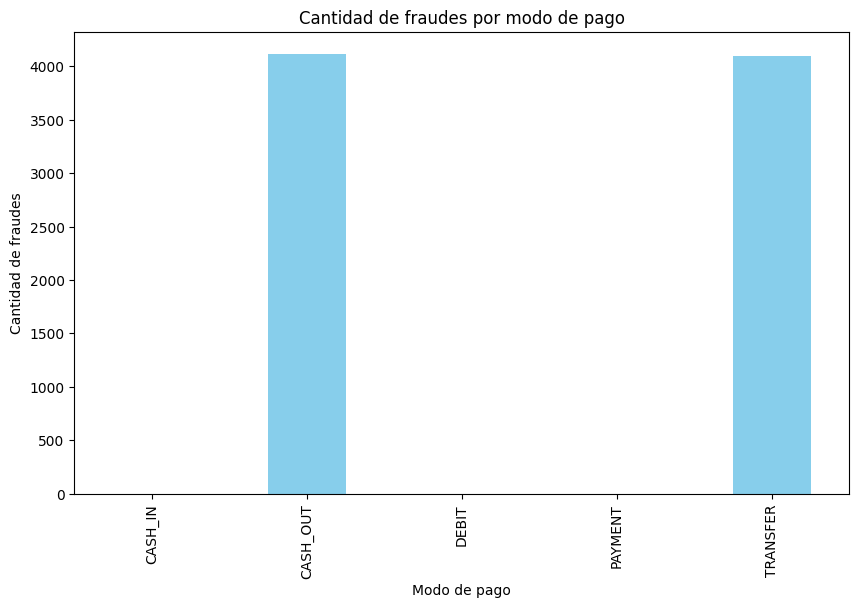

In [15]:
#Agrupar los datos por modo de pago y contar la cantidad de fraudes en cada grupo
#fraudes_por_pago = fraude('type')['isFraud'].sum()
fraudes_por_pago = fraude.groupby('type')['isFraud'].sum()
#Graficar los resultados
fraudes_por_pago.plot(kind='bar', figsize=(10, 6), color='skyblue')

#Agregar etiquetas y título
plt.title('Cantidad de fraudes por modo de pago')
plt.xlabel('Modo de pago')
plt.ylabel('Cantidad de fraudes')

plt.show()



mapa de correlacion para ver relacion fraude con montos 

In [16]:
import seaborn as sns

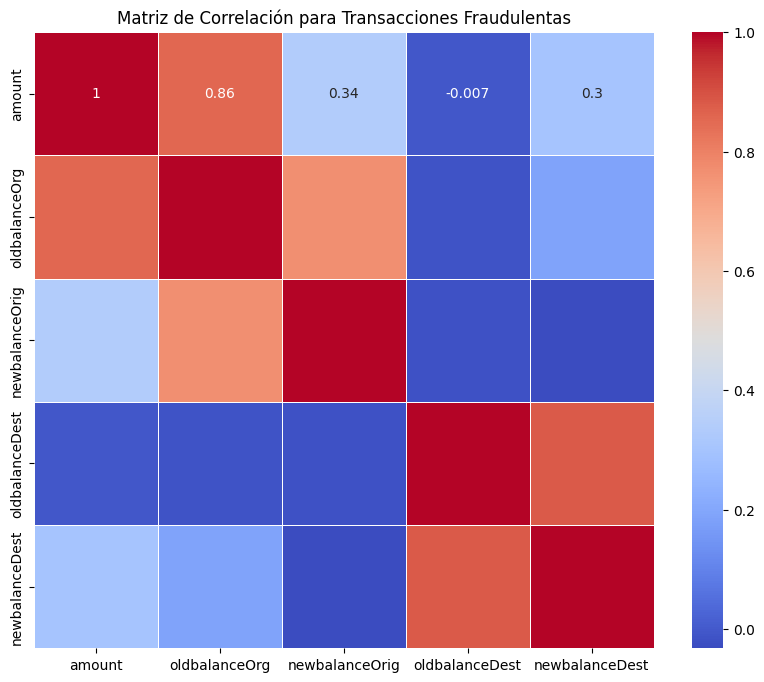

In [17]:
fraud_data = fraude[fraude['isFraud'] == 1]

# Selecciona las columnas relevantes
columns_of_interest = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Crea un nuevo DataFrame solo con las columnas seleccionadas
fraud_data_subset = fraud_data[columns_of_interest]

# Calcula la matriz de correlación
correlation_matrix = fraud_data_subset.corr()

# Crea un mapa de calor utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación para Transacciones Fraudulentas')
plt.show()


In [20]:
fraude['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

hay mucha relación del monto y fraude.

Ahora veremos la relación entre monto, destinatario y fraude

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Distribución del tipo de transacción')

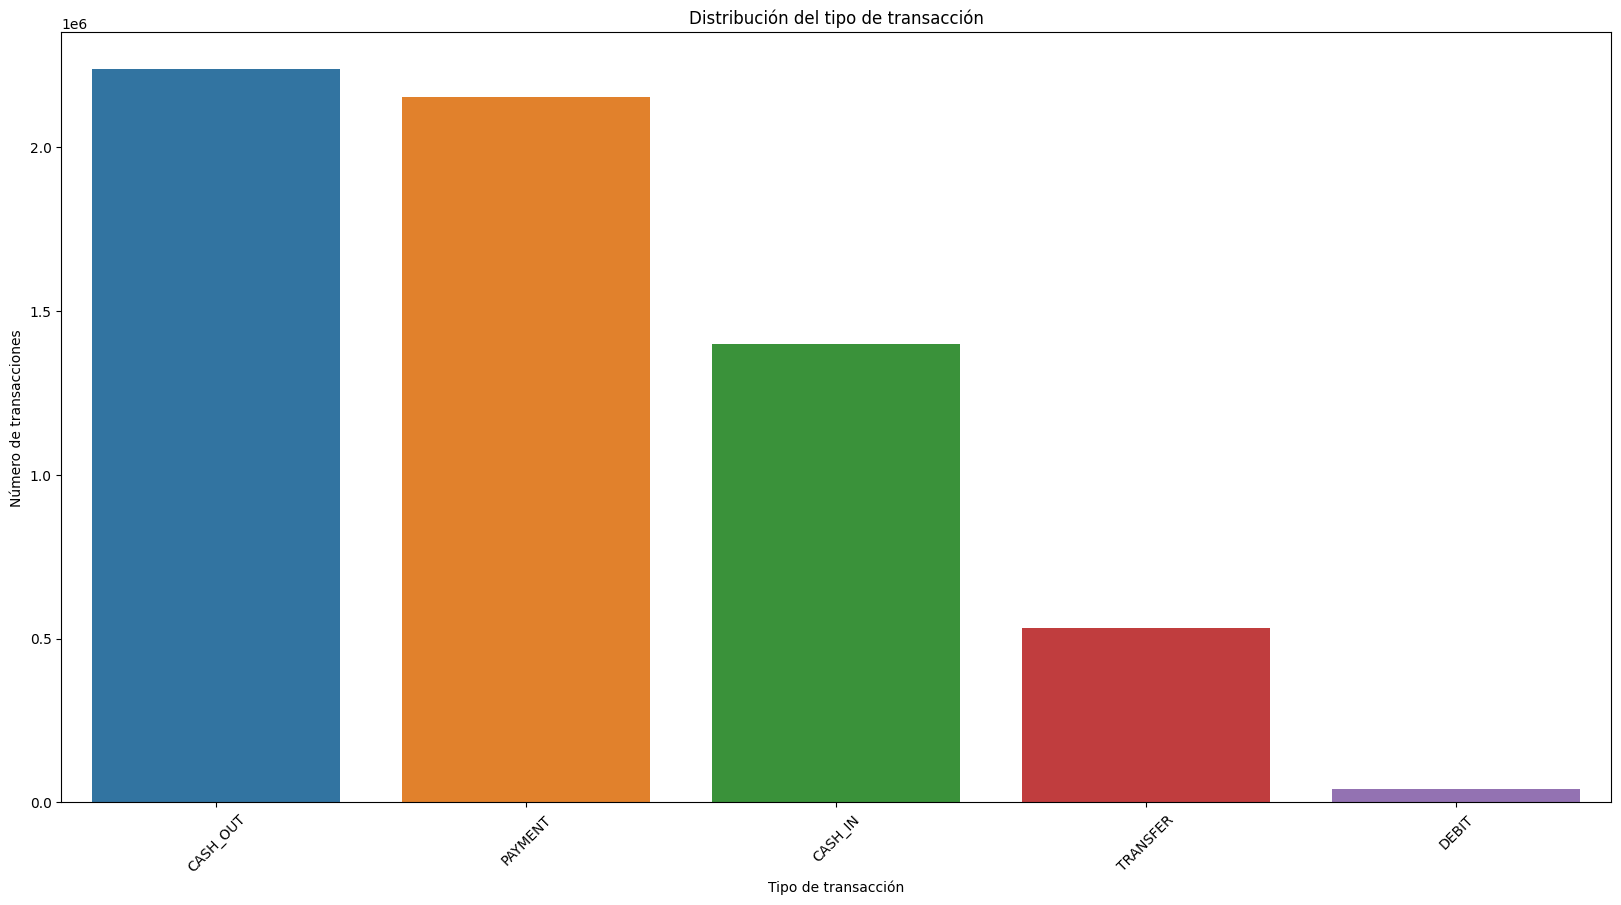

In [18]:
print(fraude['type'].value_counts())

# lo mismo plot.figure(figzize=(20,10)) y plot.rcParamns['figure.figsize'] = [20,10]
# plt.figure(figsize=(20,10))
plt.rcParams['figure.figsize']=[20,10]
sns.countplot(x='type', data=fraude, order=fraude['type'].value_counts().index)
plt.xticks(rotation= 45) # Rotación del texto en el eje x
plt.xlabel('Tipo de transacción')
plt.ylabel('Número de transacciones')
plt.title('Distribución del tipo de transacción')